In [8]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install tensorflow
!pip install sklearn
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pip

In [9]:
import zipfile
import pandas as pd 

with zipfile.ZipFile("/home/kunal/Projects/Digit-recognizer/train.csv.zip", "r") as zip_ref:
    with zip_ref.open("train.csv", "r") as df:
        df_train = pd.read_csv(df)


In [10]:
# Adding the training file and seperating the label column into a diff variable
X = df_train.drop('label', axis =1)
y = df_train['label']
print("the shape of X is", X.shape)
print("the shape of y is", y.shape)


the shape of X is (42000, 784)
the shape of y is (42000,)


In [11]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
# Splitting the data 
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)
print("X_train shape",X_train.shape)
print("X_val shape",X_val.shape)
print("y_train shape",y_train.shape)
print("y_val shape",y_val.shape)
y_train = np.eye(10)[y_train]  # Assuming y_train is integer-encoded
y_val = np.eye(10)[y_val]
print("------")
print("y_train shape",y_train.shape)
print("y_val shape",y_val.shape)


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


X_train shape (33600, 784)
X_val shape (8400, 784)
y_train shape (33600,)
y_val shape (8400,)
------
y_train shape (33600, 10)
y_val shape (8400, 10)


In [12]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(784, activation ='relu', input_shape =[784]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax'),
])

2024-02-03 21:29:39.053604: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-03 21:29:39.248246: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-03 21:29:39.248427: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-03 21:29:39.292299: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-03 21:29:39.353396: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-03 21:29:39.355125: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [13]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [14]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.001,
    restore_best_weights=True,
)
print(y_train.shape, y_val.shape)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=256,
    epochs=100,
    callbacks=[early_stopping],
    verbose=2, # hide the output because we have so many epochs
)

(33600, 10) (8400, 10)
Epoch 1/100


2024-02-03 21:29:42.011319: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 210739200 exceeds 10% of free system memory.
2024-02-03 21:29:46.701151: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 52684800 exceeds 10% of free system memory.


132/132 - 5s - loss: 0.5278 - accuracy: 0.8429 - val_loss: 0.1714 - val_accuracy: 0.9476 - 5s/epoch - 37ms/step
Epoch 2/100
132/132 - 3s - loss: 0.1980 - accuracy: 0.9417 - val_loss: 0.1219 - val_accuracy: 0.9627 - 3s/epoch - 23ms/step
Epoch 3/100
132/132 - 3s - loss: 0.1403 - accuracy: 0.9581 - val_loss: 0.1084 - val_accuracy: 0.9664 - 3s/epoch - 23ms/step
Epoch 4/100
132/132 - 3s - loss: 0.1109 - accuracy: 0.9665 - val_loss: 0.1029 - val_accuracy: 0.9687 - 3s/epoch - 23ms/step
Epoch 5/100
132/132 - 3s - loss: 0.0956 - accuracy: 0.9723 - val_loss: 0.0923 - val_accuracy: 0.9715 - 3s/epoch - 22ms/step
Epoch 6/100
132/132 - 3s - loss: 0.0848 - accuracy: 0.9738 - val_loss: 0.0868 - val_accuracy: 0.9727 - 3s/epoch - 22ms/step
Epoch 7/100
132/132 - 3s - loss: 0.0738 - accuracy: 0.9774 - val_loss: 0.0879 - val_accuracy: 0.9744 - 3s/epoch - 22ms/step
Epoch 8/100
132/132 - 3s - loss: 0.0675 - accuracy: 0.9785 - val_loss: 0.0874 - val_accuracy: 0.9743 - 3s/epoch - 22ms/step
Epoch 9/100
132/132 

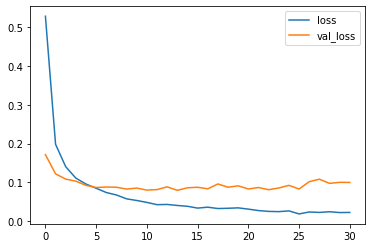

In [15]:
import matplotlib
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

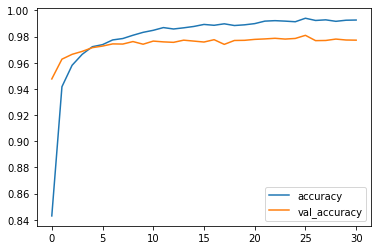

In [16]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot();